# PLANCKOV ZAKON

Planckovo funkcijo zapišemo kot:

$$
\frac{dj}{d\nu} = \frac{2h}{c^2} \cdot \frac{\nu^3}{e^{\frac{h\nu}{k T}} - 1},
$$

kjer je $h$ Planckova konstanta, $c$ hitrost svetlobe, $k$ Boltzmannova konstanta, $\nu$ frekvenca svetlobe in $T$ temperatura.

Za dano valovno dolžino $\lambda$ in temperaturo $T$ izračunamo frekvenco svetlobe $\nu$ po formuli:

$$
\nu = \frac{c}{\lambda}.
$$

Nato vstavimo $\nu$ in $T$ v Planckovo funkcijo in dobimo spektralno gostoto sevanja $\frac{dj}{d\lambda}$:

$$
\frac{dj}{d\lambda}  = \frac{2hc^2}{\lambda^5} \cdot \frac{1}{e^{\frac{hc}{\lambda k T}} - 1}.
$$

Za primerjavo si oglejmo Planckovo funkcijo pri različnih temperaturah T. Z uporabo knjižnic *numpy* in *matplotlib* bomo narisali graf spektralne gostote sevanja za različne temperature. Najprej bomo narisali za frekvenco, nato pa za valovno dolžino.

Postopek izračuna in risanja grafov je naslednji:
1. Definiramo konstante $h$, $c$ in $k$ in planckovo funkcijo.
2. Definiramo območje frekvenc $\nu$ oz. valovnih dolžin $\lambda$ in izbrane temperature.
3. Izračunamo in narišemo graf spektralne gostote sevanja za različne temperature.


In [29]:
# Naložimo potrebne knjižnice.
import numpy as np
import matplotlib.pyplot as plt

# 1
# Najprej definirajmo konstante.
h = 6.62607015e-34  # Js
c = 299792458  # m/s
k = 1.380649e-23  # J/K

# Definirajmo funkcijo, ki izračuna Planckovo funkcijo. Najprej za frekvenco.
def planck_frekvenca(f, T):
    return 2 * h * f**3 / c**2 / (np.exp(h * f / k / T) - 1)

# In še za valovno dolžino.
def planck_valovna_dolzina(l, T):
    return 2 * h * c**2 / l**5 / (np.exp(h * c / l / k / T ) - 1)

In [30]:
# 2
# Določimo frekvenco in valovno dolžino, ki jih uporabimo pri vseh izračunih.
# Seznam frekvenc.
f = np.linspace(10**10, 4*10**15, 1000)  # Hz
# Seznam valovnih dolžin.
l = np.linspace(10**-8, 3*10**-6, 1000)  # m
# Seznam temperatur.
T_seznam = [3000, 5000, 8000, 10000]  # K

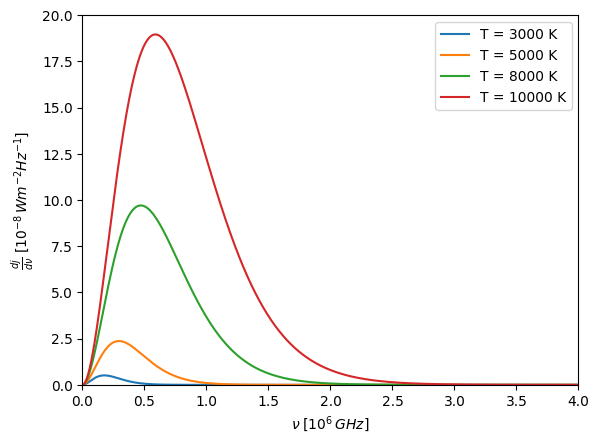

In [31]:
# 3a
# Preko for zanke izračunamo Planckovo funkcijo pri različnih temperaturah.
for i in T_seznam:
    # Nariše graf in delimo z 10**15 in 10**8 za boljšo berljivost.
    plt.plot(f/10**15, planck_frekvenca(f, i)*10**8, label='T = %s K' % i)

# Poimenujemo osi in dodamo legendo.
plt.xlabel('$\\nu \\; [10^{6} \\, GHz]$')
plt.ylabel('$\\frac{dj}{d\\nu} \\; [10^{-8} \\, W m^{-2} Hz^{-1}]$')
plt.legend()

# Dodamo mejne vrednosti na graf.
plt.xlim(0, 4)
plt.ylim(0, 20)

# Prikažemo graf.
plt.show()

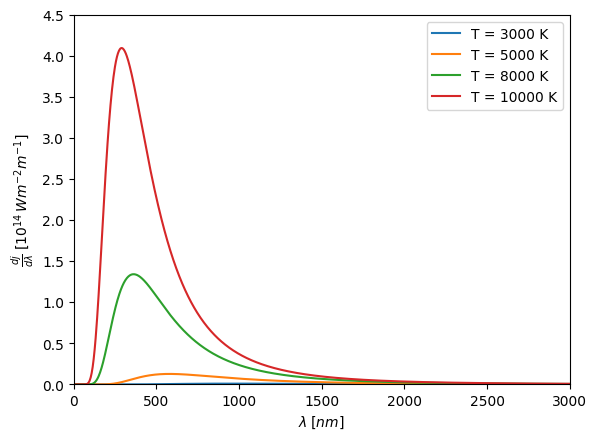

In [32]:
# 3b
# Preko for zanke izračunamo Planckovo funkcijo pri različnih temperaturah.
for i in T_seznam:
    # Narisemo graf in delimo z 10**-9 in 10**14 za boljšo berljivost.
    plt.plot(l*10**(9), planck_valovna_dolzina(l, i)/10**(14), label='T = %s K' % i)

# Poimenujemo osi in dodamo legendo.
plt.xlabel('$\\lambda \\; [nm]$')
plt.ylabel('$\\frac{dj}{d\\lambda} \\; [10^{14} \\, W m^{-2} m^{-1}]$')
plt.legend()

# Dodamo mejne vrednosti na graf.
plt.xlim(0, 3000)
plt.ylim(0, 4.5)

# Prikažemo graf.
plt.show()

## INTERAKTIVNI GRAF

V spodnjem primeru si lahko s premikanjem drsnika ogledate, kako se spreminja spektralna gostota sevanja pri različnih temperaturah.

In [33]:
# Najprej naložimo potrebne knjižnice.
from ipywidgets import interact, FloatSlider

# Fukcija, ki izriše Planckovo funkcijo za dano temperaturo.
def plot_planck(T):
    # Izračunamo Planckovo funkcijo.
    djdl = planck_valovna_dolzina(l, T)
    
    # Narišemo graf.
    plt.figure(figsize=(10, 6))
    plt.plot(l * 10**9, djdl/10**(14), color='blue')
    # Dodamo oznake na graf.
    plt.xlabel('$\\lambda \\; [nm]$')
    plt.ylabel('$\\frac{dj}{d\\lambda} \\; [10^{14} \\, W m^{-2} m^{-1}]$')
    # Nastavimo omejitve na x in y osi.
    plt.xlim(0, 3000)
    plt.ylim(0, 4.5)
    # Vključimo mrežo.
    plt.grid(True)
    
    # Označimo maksimum, ki se ga določi z Wienvim zakonom.
    Wien = 2.8977685 * 10**(-3) / T * 10**(9)
    plt.axvline(x=Wien, color='red', linestyle='--', label='Wien law')
    plt.text(Wien, 4.6, 'λ = %s nm' % round(Wien, 2), color='red', fontsize=12)
    plt.axhline(y=max(djdl/10**(14)), color='red', linestyle='--')
    plt.text(3005, max(djdl/10**(14)), '$(\\frac{dj}{d\\lambda})_{vrh} =$ %s $\\cdot 10^{14} \\; W m^{-2} m^{-1}$' % round(max(djdl/(10**(14))), 2), color='red', fontsize=12)
    # Narišemo še krivuljo, ki označuje maksimume.
    plt.plot(l * 10**9, 8.331504355156736*10**12 * (l* 10**9)**(-5) + 237643571003.3047/10**14, color='green', linestyle='--', label='$\\lambda^{-5}$')
    plt.show()

# Interaktivni prikaz.
interact(plot_planck,T=FloatSlider(value=5800, min=3000, max=10000, step=50, description='T [K]'))

interactive(children=(FloatSlider(value=5800.0, description='T [K]', max=10000.0, min=3000.0, step=50.0), Outp…

<function __main__.plot_planck(T)>

Iz dane Planckove funkcije lahko izračunamo tudi gostoto svetlobnega toka, ki je enaka integralu Planckove funkcije

$$
j = \int_{0}^{\infty} \frac{dj}{d\lambda} d\lambda.
$$

Rešitev tega integrala poznamo saj vodi do Stefan-Boltzmannovega zakona, ki pravi, da je gostota svetlobnega toka sorazmerna s četrto potenco temperature:

$$
j = \sigma T^4,
$$

kjer je $\sigma$ Stefanova konstanta. Velikokrat pa opazujemo samo v določenem območju valovnih dolžin, kar pomeni, da se meje gornjega integrala spremenijo. V tem primeru je gostota svetlobnega toka enaka

$$
j = \int_{\lambda_1}^{\lambda_2} \frac{dj}{d\lambda} d\lambda.
$$

Integral je analitično nerešljiv, zato ga je potrebno 'rešiti' na drugačen način. Tukaj ga bomo rešili na tri načine:
- z uporabo približka,
- z aproksimacijo,
- z numerično integracijo.

Tukaj lahko začnemo z našo prvo računsko nalogo.

## 1.NALOGA: RAYLEIGH-JEANSOV IN WIENOV PRIBLIŽEK

Upoštevaj sevanje črnega telesa, ki ga opisuje Planckova funkcija

$$
    \frac{dj}{d \nu} (T) = \frac{2 \pi h}{c^2} \frac{\nu^3}{e^{h\nu/kT}-1} \; .
$$

Izrazi gostoto svetlobnega toka za radijski frekvenčni pas med $\nu_1 = 100$ MHz in $\nu_2 = 200$ MHz. Pri integralu uporabi približek (Rayleigh-Jeansov ali Wienov približek). Pred tem preveri, ali bo integral veljal za temperature od $T_1 = 10$ K do $T_2 = 5 \cdot 10^4$ K. Kateri približek boš uporabil za integral, če računaš v rentgenskem frekvenčnem pasu med $\nu_1 = 10^{17}$ Hz in $\nu_2 = 10^{18}$ Hz? Zapiši ga.

Pri uporabi približka je potrebno upoštevat vrednost eksponenta $h\nu/kT$. Preverimo kakšne so vrednosti eksponenta za sledeče vrednosti:

$\nu_1 = 100 MHz = 10^8 s^{-1}, \\ $
$\nu_2 = 200 MHz = 2 \cdot 10^8 s^{-1}, \\$
$T_1 = 10 K, \\$
$T_2 = 5 \cdot 10^4 K.$

In [34]:
# Definiramo mejne vrednosti.
f1_a = 100 * 10**6 # Hz
f2_a = 200 * 10**6 # Hz
T1 = 10 # K
T2 = 5000 # K

# Izračunamo vrednosti eksponentov.
exp11 = h * f1_a / k / T1
exp12 = h * f1_a / k / T2
exp21 = h * f2_a / k / T1
exp22 = h * f2_a / k / T2

# Napišemo rezultate.
print('Eksponent za v = 100 MHz in T = 10 K je', exp11)
print('Eksponent za v = 100 MHz in T = 5000 K je,',  exp12)
print('Eksponent za v = 200 MHz in T = 10 K je', exp21)
print('Eksponent za v = 200 MHz in T = 5000 K je', exp22)

Eksponent za v = 100 MHz in T = 10 K je 0.0004799243073366221
Eksponent za v = 100 MHz in T = 5000 K je, 9.598486146732443e-07
Eksponent za v = 200 MHz in T = 10 K je 0.0009598486146732442
Eksponent za v = 200 MHz in T = 5000 K je 1.9196972293464886e-06


V skrajnem primeru je najvišja vrednost eksponenta $h\nu/kT \approx 0.001$. Če je vrednost $h\nu/kT  \ll 1$, lahko $e^{h\nu/kT}$ razvijemo v Taylorjevo vrsto in zadržimo samo prva dva člena:

$$
e^{h\nu/kT} \approx 1 + \frac{h\nu}{kT}.
$$

Vstavimo v Planckovo funkcijo, kar vodi v Rayleigh-Jeansov približek:

$$
\frac{dj}{d\nu} \approx \frac{2\pi h}{c^2} \frac{\nu^3}{1 + \frac{h\nu}{kT} - 1} = \frac{2\pi k T}{c^2} \nu^2.
$$

Sedaj je integral analitično rešljiv:

$$
\int dj = \int_{\nu_1}^{\nu_2} \frac{2\pi k T}{c^2} \nu^2 d\nu \\
j = \frac{2\pi k T}{c^2} \left[ \frac{\nu^3}{3} \right]_{\nu_1}^{\nu_2} = \frac{2\pi k T}{c^2} \left( \frac{\nu_2^3 - \nu_1^3}{3} \right).
$$

Poglejmo si še vrednosti eksponenta za rentgenski frekvenčni pas:

$\nu_1 = 10^{17} Hz = 10^{17} s^{-1}, \\ $
$\nu_2 = 10^{18} Hz = 10^{18} s^{-1}, \\$

In [35]:
# Definiramo mejne vrednosti.
f1_b = 10**17 # Hz
f2_b = 10**18 # Hz

# Izračunamo vrednosti eksponentov.
exp11 = h * f1_b / k / T1
exp12 = h * f1_b / k / T2
exp21 = h * f2_b / k / T1
exp22 = h * f2_b / k / T2

# Napišemo rezultate.
print('Eksponent za v = 10^18 Hz in T = 10 K je', exp11)
print('Eksponent za v = 10^18 Hz in T = 5000 K je', exp12)
print('Eksponent za v = 10^19 Hz in T = 10 K je', exp21)
print('Eksponent za v = 10^19 Hz in T = 5000 K je', exp22)

Eksponent za v = 10^18 Hz in T = 10 K je 479924.30733662203
Eksponent za v = 10^18 Hz in T = 5000 K je 959.848614673244
Eksponent za v = 10^19 Hz in T = 10 K je 4799243.073366221
Eksponent za v = 10^19 Hz in T = 5000 K je 9598.486146732443


Vse vrednosti eksponenta so $h\nu/kT  \gg 1$, kar pomeni, da je

$$
e^{h\nu/kT} -1 \approx e^{h\nu/kT},
$$

kar vodi v Wienov približek:

$$
\frac{dj}{d\nu} \approx \frac{2\pi h}{c^2} \nu^3 e^{-\frac{h\nu}{kT}}.
$$

Tudi ta integral je analitično rešljiv vendar je malenkost bolj zapleten. Začnimo z uvedbo nove spremenljivke $x=\frac{h\nu}{kT}$ in $dx = \frac{h}{kT} d\nu$. Sedaj lahko integral prepišemo:

$$
j = \frac{2\pi k^4 T^4}{c^2 h^3} \int_{x_1}^{x_2} x^3e^{-x} dx.
$$

Opazimo, da je integral rešljiv z metodo per partes:

$$
j = \frac{2\pi k^4 T^4}{c^2 h^3} \left[ -x^3e^{-x} + 3\int_{x_1}^{x^2} x^2e^{-x} dx \right]_{x_1}^{x^2} \\
j = \frac{2\pi k^4 T^4}{c^2 h^3} \left[ -x^3e^{-x} - 3x^2e^{-x} + 6\int_{x_1}^{x^2} x e^{-x} dx) \right]_{x_1}^{x^2} \\
j = \frac{2\pi k^4 T^4}{c^2 h^3} \left[ -x^3e^{-x} - 3x^2e^{-x} - 6xe^{-x} + 6\int_{x_1}^{x^2} e^{-x} dx) \right]_{x_1}^{x^2} \\
j = \frac{2\pi k^4 T^4}{c^2 h^3} \left[ -x^3e^{-x} + 3x^2e^{-x} - 6xe^{-x} - 6e^{-x} \right]_{x_1}^{x^2} \\
j = \frac{2\pi k^4 T^4}{c^2 h^3} \left[-e^{-x}(x^3 + 3x^2 + 6x + 6) \right]_{x_1}^{x^2} \\
$$

Zaradi dolžine izraza, ga ne bomo razpisali do konca, ampak pustili v tej obliki.

V tej točki smo nalogo rešili. Dodatno pa bomo še napisali kratek program, ki bo izračunal gostoto svetlobnega toka za dane vrednosti frekvenc in temperatur.

In [36]:
# Funkcija za izračun Rayleigh-Jeansovega približka.
def rayleigh_jeans(f1, f2, T):
    return 2 * np.pi * k * T / (3 * c**2) * (f2**3 - f1**3)

# Funkcija za izračun Wienovega približka.
def wien(f1, f2, T):
    # Izračunamo vrednosti mejnih vrednosti.
    x1, x2 = h * f1 / k / T, h * f2 / k / T
    # Izračunamo konstanto.
    A = 2 * np.pi * k**4 * T**4 / (c**2 * h**3)
    # Izračunamo integral.
    i1, i2 = -np.exp(-x1) * (x1**3 + 3 * x1**2 + 6 * x1 + 6), -np.exp(-x2) * (x2**3 + 3 * x2**2 + 6 * x2 + 6)
    return A * (i2 - i1)

# Vstavimo vrednosti iz naloge in izračunamo.
Rayleigh1 = rayleigh_jeans(f1_a, f2_a, T1)
Rayleigh2 = rayleigh_jeans(f1_a, f2_a, T2)
Wien1 = wien(f1_b, f2_b, T1)
Wien2 = wien(f1_b, f2_b, T2)

# Napišemo rezultate.
print('Rayleigh-Jeansov približek za v = [100, 200] MHz in T = 10 K je', Rayleigh1)
print('Rayleigh-Jeansov približek za v = [100, 200] MHz in T = 5000 K je', Rayleigh2)
print('Wienov približek za v = [1e11, 1e12] MHz in T = 10 K je', Wien1)
print('Wienov približek za v = [1e11, 1e12] MHz in T = 5000 K je', Wien2)


Rayleigh-Jeansov približek za v = [100, 200] MHz in T = 10 K je 2.252156316308217e-14
Rayleigh-Jeansov približek za v = [100, 200] MHz in T = 5000 K je 1.1260781581541085e-11
Wienov približek za v = [1e11, 1e12] MHz in T = 10 K je 0.0
Wienov približek za v = [1e11, 1e12] MHz in T = 5000 K je 0.0


Vidimo, da so dobljene vrednosti gostote svetlobnega toka zelo majhne. To pomeni, da je uporaba približkov zelo omejena.

V tej nalogo smo delali približek za Planckovo funkcijo odvisno od frekvence. Naslednja naloga pa bo, da bomo delali približek odvisno od valovne dolžine.

## 2. NALOGA: UPORABA PRIBLIŽKA ZA RADIJSKO VALOVE

Izpelji izraz za delež gostote svetlobnega toka, ki ga črno telo izseva v območju $[\lambda_1, \lambda_2]$, kjer sta $\lambda_1, \lambda_2 \gg \lambda_{\rm vrh}$. Kolikšno gostoto svetlobnega toka izseva svetilo pri $100$ W v radijskem območju valovnih dolžin, t.j. $\lambda \ge 1$ cm? Privzemi temperaturo $2500$ K.

Ko velja $\lambda_1, \lambda_2 \gg \lambda_{\rm vrh}$, lahko uporaibmo Rayleigh-Jeansov približek. V tem primeru je Planckova funkcija enaka

$$
j_{\rm radio} = \frac{2h c^2}{\lambda^5} \frac{1}{e^{\frac{hc}{\lambda k T}} - 1} \approx \frac{2ckT}{3} \Biggl(\frac{1}{\lambda_1^3} - \frac{1}{\lambda_2^3}\Biggr).
$$

Ker računamo delež gostote svetlobnega toka moramo vedeti celotno gostoto svetlobnega toka. Ta je enaka

$$
j_{\rm total} = \sigma T^4 = \frac{2k^4\pi^4}{15c^2h^3}T^4.
$$

Delež gostote svetlobnega toka je enak

$$
\frac{j_{\rm radio}}{j_{\rm total}} = \frac{2ckT}{3} \Biggl(\frac{1}{\lambda_1^3} - \frac{1}{\lambda_2^3}\Biggr) \frac{15c^2h^3}{2k^4\pi^4 T^4} = \frac{5h^2c^3}{k^3\pi^4} \frac{1}{T^3} \Biggl(\frac{1}{\lambda_1^3} - \frac{1}{\lambda_2^3}\Biggr).
$$

Dobili smo izraz za delež gostote svetlobnega toka, ki ga črno telo izseva v območju $[\lambda_1, \lambda_2]$. Sedaj lahko izračunamo gostoto svetlobnega toka za dane vrednosti valovnih dolžin in temperatur. Vidimo, da imamo na voljo $\lambda_1 = 1$ cm, ne pa tudi $\lambda_2$. V tem primeru lahko privzamemo, da je $\lambda_2 = \infty$, kar pomeni, da se naš izraz poenostavi v

$$
\frac{j_{\rm radio}}{j_{\rm total}} = \frac{5h^2c^3}{k^3\pi^4} \frac{1}{T^3} \Biggl(\frac{1}{\lambda_1^3}\Biggr).
$$

Opazimo tudi, da nimamo na voljo gostote svetlobnega toka ampak moč oz. izsev svetila, ki je $L=100$ W. Poznamo pa povezavo med močjo in gostoto svetlobnega toka:

$$
L = j 4\pi r^2,
$$

kjer je $r$ oddaljenost od svetila. Iz tega sledi, da je

$$
\frac{j_{\rm radio}}{j_{\rm total}} = \frac{L_{\rm radio}}{L_{\rm total}}.
$$

Torej je izsev svetila v radijskem območju enak

$$
L_{\rm radio} = L_{\rm total} \frac{5h^2c^3}{k^3\pi^4} \frac{1}{T^3} \Biggl(\frac{1}{\lambda_1^3}\Biggr).
$$

In [37]:
# Določeni podatki.
l_radio = 0.01 # m
T_svetilo = 2500 # K
L_total = 100 # W

# Izračunamo izsevano moč.
L = L_total * 5 * c**3 * h**3 / (k**3 * np.pi**4)  / T_svetilo**3 / l_radio**3
print('Izsevana moč je', L, 'W')

Izsevana moč je 9.784324248095363e-10 W


Ker nimamo na voljo oddaljenosti $r$, ne moremo izračunati gostote svetlobnega toka. Vseeno je razvidno, da je izsev svetila v radijskem območju zelo majhen.

Preden se lotimo računanja z aproksimacijo si oglejmo še sledečo nalogo.

## 3. NALOGA: Wienov zakon

Pri kateri valovni dolžini ima sevanje zvezde tipa B5 maksimum, če je njena površinska temperatura $16400$ K? Sevanje Sonca ima maksimum pri valovni dolžini $500$ nm.

Wienov zakon pravi, da je valovna dolžina $\lambda_{\rm vrh}$, pri kateri je spektralna gostota sevanja največja, obratno sorazmerna s temperaturo $T$:

$$
\lambda_{\rm vrh} = \frac{b}{T},
$$

kjer je $b$ konstanta, ki jo imenujemo Wienv konstanta in znaša $b = 2.897 \times 10^{-3} \, \rm m K$. Iz tega razmerja lahko tudi izpeljemo, da je $\bigl(\frac{dj}{d\lambda}\bigr)_{\rm vrh} \propto T^{5}$, kar smo tudi uporabili pri interaktivnem grafu.

Zaradi te zveze je naša naloga zelo enostavna. Lahko uporabimo kar Wienovo konstanto, v primeru pa, da se je ne spomnimo vemo, da se produkt $T\lambda_{\rm vrh}$ ohranja. Iz tega sledi, da je

$$
T_1 \lambda_{\rm vrh, 1} = T_2 \lambda_{\rm vrh, 2} \Rightarrow \lambda_{\rm vrh, 2} = \frac{T_2}{T_1} \lambda_{\rm vrh, 1}.
$$

To znanje nam omogoča napisati preprosti pretvornik.

In [38]:
# Pretvornik maksimuma v valovni dolžini.
def pretvornik(T1, T2, l_m1):
    l_m2 = l_m1 * T1 / T2
    return l_m2

T_Sonce = 5777 # K (Sonce)
T_B5 = 16400 # K

l_Sonce = 500 # nm

l_B5 = pretvornik(T_Sonce, T_B5, l_Sonce)

print('Valovna dolžina maksimuma pri T = 16400 K je', l_B5, 'nm')

Valovna dolžina maksimuma pri T = 16400 K je 176.1280487804878 nm


Naša rešitev je torej 176 nm, pri čemer smo predpostavili, da je temperatura Sonca $5777$ K.

## APROKSIMACIJA

Če rešujemo na papir je najbolje reči, da je $d\lambda = \Delta \lambda$ in izračunamo gostoto svetlobnega toka kot

$$
j = \frac{dj}{d\lambda} \cdot \Delta \lambda.
$$

kjer je $\Delta \lambda = \lambda_2 - \lambda_1$. Treba se je zavedati, da je ta izračun približek, kako natančen je pa je odvisno od velikosti $\Delta \lambda$. Spodaj je prikazan tudi interaktivni primer, kako natančen je približek.

Če želimo narediti natančnejši izračun gostote svetlobnega toka, uporabimo numerično integracijo. V tem primeru lahko uporabimo funkcijo \textbf{quad} iz knjižnice \textbf{scipy.integrate}. Za vajo pa lahko napišemo preprosti integrator tudi sami.

In [56]:
# Preprosti integrator, ki uporablja trapezno metodo.
def integrator(fx, korak): # fx je funkcija, ki jo integriramo, a in b sta meji integracije, h je korak
    vsota = 0
    for i in range(1, len(fx)-1):
        vsota += (fx[i] + fx[i+1]) / 2 * korak
        #print(vsota)
    return vsota

# Numerični izračun gostote svetlobnega toka z uporabo trapezne metode.
def gostota_svetlobnega_toka(l1, l2, T):
    # Naredimo seznam valovnih dolžin.
    l_seznam = np.linspace(l1, l2, 100)
    # Izračunamo Planckovo funkcijo.
    djdl = planck_valovna_dolzina(l_seznam, T)
    # Izračunamo gostoto svetlobnega toka.
    return integrator(djdl, l_seznam[1]-l_seznam[0])

# Numerični prbliže za gostoto svetlobnega toka.
def priblizek_gostote_svetlobnega_toka(l0, dl, T):
    # Izračunamo Planckovo funkcijo.
    djdl = planck_valovna_dolzina(l0, T)
    # Izračunamo gostoto svetlobnega toka.
    return djdl * dl

# Izračunamo gostoto svetlobnega toka za Sonce pri l=600 nm in dl = 100 nm.
l_s = 600 * 10**-9  # m
dl = 100 * 10**-9  # m
T_Sonce = 5777  # K
j = gostota_svetlobnega_toka(l_s-dl/2, l_s+dl/2, T_Sonce)
j_priblizek = priblizek_gostote_svetlobnega_toka(l_s, dl, T_Sonce)

# Izpišemo rezultate.
print('Integrator: j = %s W/m^2.' % j)
print('Približek: j = %s W/m^2.' % j_priblizek)
# Napišemo še relativno napako.
print('Relativna napaka: %s.' % (abs(j-j_priblizek) / j))


Integrator: j = 2417715.4630293446 W/m^2.
Približek: j = 2451112.13842102 W/m^2.
Relativna napaka: 0.013813319185968283.


Vidimo, da je uporabo približka lahko uporabna, če želimo hitro izračunati gostoto svetlobnega toka pri določenem območju valovnih dolžin. Na spodnjem interaktivnem primeru lahko spreminjamo meje valovnih dolžin in opazujemo, kako se spreminja natančnost približka. Pri uporabi približka moramo biti previdni, saj je ta natančen le v primeru, ko je območje, ki ga integriramo, zelo ozko. Uporaben je tudi v okolici maksimuma, pod pogojem da je $\Delta \lambda$ dovolj majhen.

## INTERAKTIVNI GRAF APOROKSIMACIJE

In [57]:
# Funkcija za grafični prikaz preprostega približka.
def prikaz_priblizka(l1,l2,T):
    # Spremenimo l1 in l2 v m.
    l1, l2 = l1*10**-9, l2*10**-9
    # Izračunamo Planckovo funkcijo.
    djdl = planck_valovna_dolzina(l, T)  # Planckova funkcija.

    # Določimo dl in vrednost pri (l2-l1)/2.
    dl = l2 - l1
    djdl_sredina = planck_valovna_dolzina((l1+l2)/2, T)/10**(14)

    # Izračunamo maksimum.
    djdl_max = np.max(djdl)*10**-14
    
    # Narišemo graf.
    plt.figure(figsize=(10, 6))
    plt.plot(l*10**9, djdl/10**(14), color='blue')
    # Dodamo oznake na graf.
    plt.xlabel('$\\lambda [nm]$')
    plt.ylabel('$\\frac{dj}{d\\lambda}$')
    # Nastavimo omejitve na x in y osi.
    plt.xlim(0, 3000)
    plt.ylim(0, djdl_max+0.1)
    # Vključimo mrežo.
    plt.grid(True)

    # Narišemo dve vertikalni črti, ki označujeta območje.
    plt.axvline(x=l1*10**9, color='gray')
    plt.axvline(x=l2*10**9, color='gray')
    # Pobarvamo območje. Najprej dejansko območje, nato pa približek.
    plt.fill_between(l*10**9, djdl/10**(14), where=(l >= l1) & (l <= l2), color='gray', alpha=0.5, hatch='x')
    plt.fill_between(l*10**9, djdl_sredina, where=(l >= l1) & (l <= l2), color='red', alpha=0.25)

    # Izračunamo gostoto svetlobnega toka in približek ter ga zapišemo na graf.
    j = gostota_svetlobnega_toka(l1, l2, T)
    j_priblizek = priblizek_gostote_svetlobnega_toka((l1+l2)/2, dl, T)
    # Get the top 
    plt.text(3025, djdl_max+0.1, '$j_{integral} = %s$ W/m$^2$' % round(j, 2), color='black', fontsize=12)
    plt.text(3025, djdl_max+0.1-0.02, '$j_{približek} = %s$ W/m$^2$' % round(j_priblizek, 2), color='red', fontsize=12)
    plt.text(3025, djdl_max+0.1-0.04, 'Relativna napaka: %s' % round(abs(j-j_priblizek) / j, 4), color='black', fontsize=12)

    plt.show()

# Interaktivni prikaz.
interact(prikaz_priblizka, l1=FloatSlider(value=400, min=0, max=3000, step=50, description='l1 [nm]'),l2=FloatSlider(value=600, min=0, max=3000, step=50, description='l2 [nm]'), T=FloatSlider(value=5800, min=3000, max=10000, step=100, description='T [K]'))

interactive(children=(FloatSlider(value=400.0, description='l1 [nm]', max=3000.0, step=50.0), FloatSlider(valu…

<function __main__.prikaz_priblizka(l1, l2, T)>

Dokler je $\Delta \lambda < 100$ nm je približek za naše namene dovolj natančen, saj je relativna napaka majhna. To nam še posebno prav pride v sledeči nalogi.